# MA(q)

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

For $\text{MA}(q)$ it can be shown that,

$
\begin{align}
&\text{E}[X_t] = 0 \\
&\text{E}[X_t^2] = \sigma^2 \left( \sum_{i=1}^q \vartheta_i^2 + 1 \right) \\
&\text{E}[X_t X_{t+n}] = \sigma^2 \left( \sum_{i=i}^{q-n} \vartheta_i \vartheta_{i+n} + \vartheta_n \right)
\end{align}
$

The autocorrelation is defined by,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t+n}]}{\text{E}[X_t^2]}
\end{align}
$

Note that $\gamma_n$ is independent of $t$. This is in contrast to $\text{AR}(1)$ which depends on $t$. Also, for</br>
$n \geq q$ it is seen that $\gamma_n=0$.

### Example $\text{MA}(1)$

First consider $\text{MA}(1)$,

$
\begin{align}
X_t = \varepsilon_t + \vartheta_1 \varepsilon_{t-1}
\end{align}
$

The moments are given by,

$
\begin{align}
&\text{E}[X_t] = 0 \\
&\text{E}[X_t^2] = \sigma^2 \left( \vartheta_1^2 + 1 \right) \\
\end{align}
$

For $n=1$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = \sigma^2 \theta_1 \\
&\gamma_1 = \theta_1
\end{align}
$

and $n > 2$,

$
\begin{align}
&\text{E}[X_t X_{t+2}] = 0 \\
&\gamma_n = 0
\end{align}
$

### Example $\text{MA}(2)$

Next consider $\text{MA}(2)$,

$
\begin{align}
X_t = \varepsilon_t + \vartheta_1 \varepsilon_{t-1} + \vartheta_2 \varepsilon_{t-2} 
\end{align}
$

The moments are given by,

$
\begin{align}
&\text{E}[X_t] = 0 \\
&\text{E}[X_t^2] = \sigma^2 \left( \vartheta_1^2 + \vartheta_2^2 + 1 \right) \\
\end{align}
$

For $n=1$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = \sigma^2 \left( \vartheta_1 \vartheta_2 + \vartheta_1 \right) \\
&\gamma_1 = \vartheta_1 \vartheta_2 + \vartheta_1 + \vartheta_2
\end{align}
$

For $n=2$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = \sigma^2 \vartheta_2 \\
&\gamma_2 = \vartheta_2
\end{align}
$

and $n>2$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = 0 \\
&\gamma_n = 0
\end{align}
$

### Relation to $\text{AR}(1)$
AR(1) is related to $\text{MA}(\infty)$. To see this consider $\text{AR}(1)$,

$
\begin{align}
X_t = \left( 1 - \varphi L \right)^{-1} \varepsilon_t
\end{align}
$

where $L$ is the shift operator,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

In the limit $t \to \infty$ it can be shown that for $\lvert \varphi \rvert < 1$,

$
\begin{align}
\left( 1 - \varphi L \right)^{-1} = \sum_{i = 0}^{\infty} \varphi^i L^i
\end{align}
$

It follows that,

$
\begin{align}
X_t = \sum_{i=0}^{\infty} \varphi^i L^i \varepsilon_t
\end{align}
$

which is $\text{MA}(\infty)$ with $\vartheta_i = \varphi^i$.


## Imports

In [69]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [70]:
σ = 1

def sigma(θ):
    q = len(θ)
    v = 0
    for u in θ:
        v += u**2
    return σ * numpy.sqrt(v + 1)

def cov(θ):
    q = len(θ)
    c = numpy.zeros(q)
    s = numpy.zeros(q)
    for n in range(1,q):
        for i in range(q-n):
            c[n] += θ[i]*θ[i+n]
    for n in range(q):
        s[n] = θ[n]
    return σ**2 * (c + s)

def auto_correlation(θ):
    return cov(θ) / sigma(θ)**2
    
def ma_ensemble(θ, nsample, nsim):
    series = numpy.array([arima.maq(θ2, nsample, σ)])
    for i in range(1, nsim):
        series = numpy.append(series, numpy.array([arima.maq(θ2, nsample, σ)]), axis=0)
    return series

## Plots

In [71]:
def auto_correlation_plot(ac_sample, θ, nplot, title, ylim):
    ac = auto_correlation(θ)
    ac_eq = numpy.zeros(nplot)
    ac_eq[0] = 1
    for i in range(len(ac)):
        ac_eq[i+1] = ac[i]
    figure, axis = pyplot.subplots(figsize=(15, 12))
    axis.set_ylabel(r"$γ_{\tau}$")
    axis.set_xlabel(r"Time Lag $(\tau)$")
    axis.set_ylim(ylim)
    axis.set_title(title)
    axis.plot(range(nplot), numpy.real(ac_sample[:nplot]), lw="2", label="Simualtion", zorder=5)
    axis.plot(range(nplot), ac_eq, marker='o', markersize=10.0, linestyle="None", markeredgewidth=1.0, alpha=0.75, label=r"$\rho_\tau$", zorder=6)
    axis.legend(bbox_to_anchor=(0.8, 0.8), fontsize=16)

## Simulations

In [72]:
nsample = 1000

θ1 = numpy.array([0.2])
ma1 = arima.maq(θ1, nsample, σ)

θ2 = numpy.array([0.2, 0.4])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([0.2, 0.4, 0.5])
ma3 = arima.maq(θ3, nsample, σ)

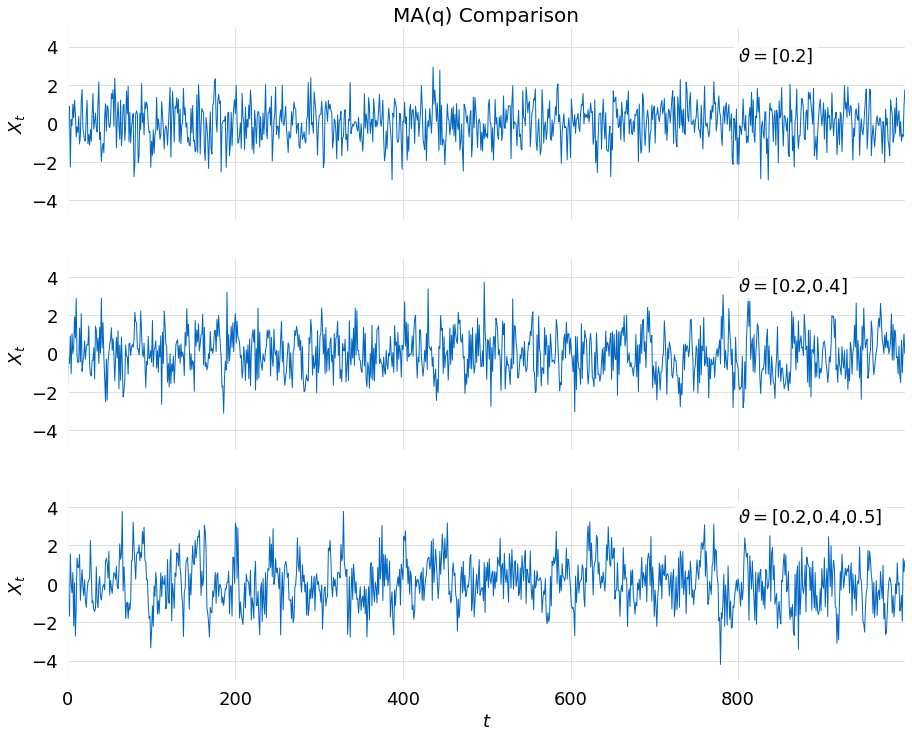

In [73]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = numpy.array([ma1, ma2, ma3])
plots.stack(samples, [-5.0, 5.0], title, labels)

In [74]:
nsample = 1000

θ1 = numpy.array([-0.2])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([-0.2, -0.4])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([0.2, -0.4, -0.5])
ma3 = arima.maq(θ3, nsample)

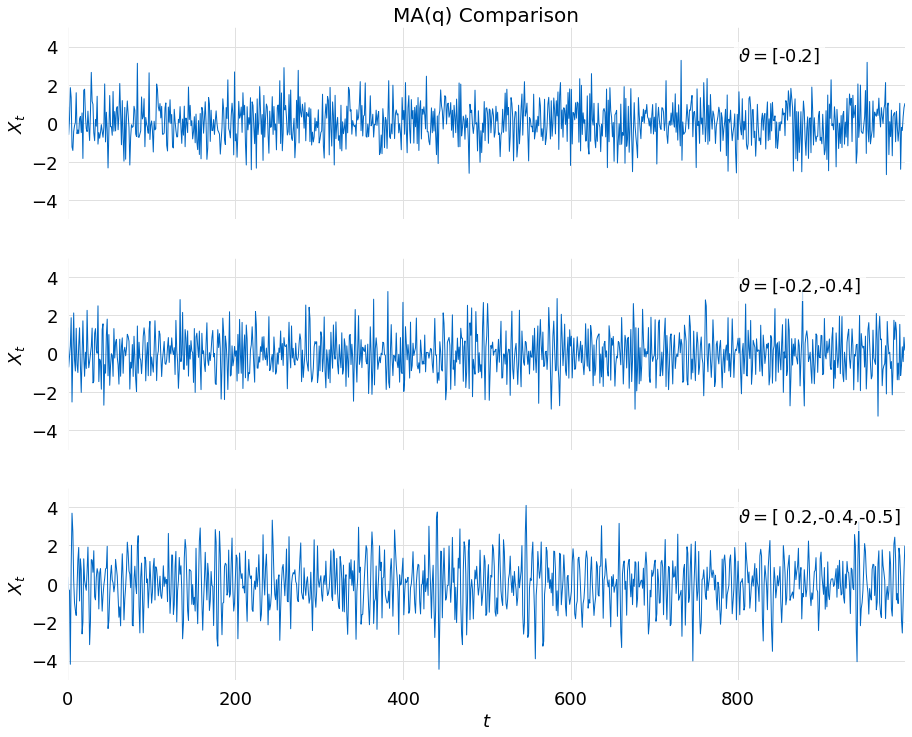

In [75]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = numpy.array([ma1, ma2, ma3])
plots.stack(samples, [-5.0, 5.0], title, labels)

In [76]:
θ1 = numpy.array([2.4])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([1.5, -1.5])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([1.2, -3.4, -1.5])
ma3 = arima.maq(θ3, nsample)

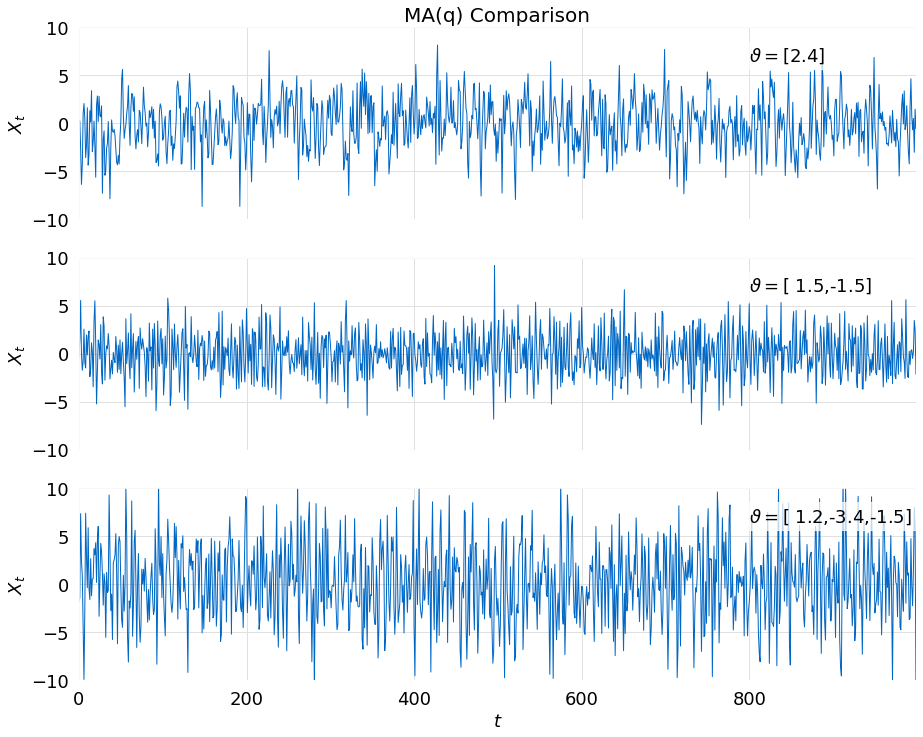

In [77]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = numpy.array([ma1, ma2, ma3])
plots.stack(samples, [-10.0, 10.0], title, labels)

## Mean

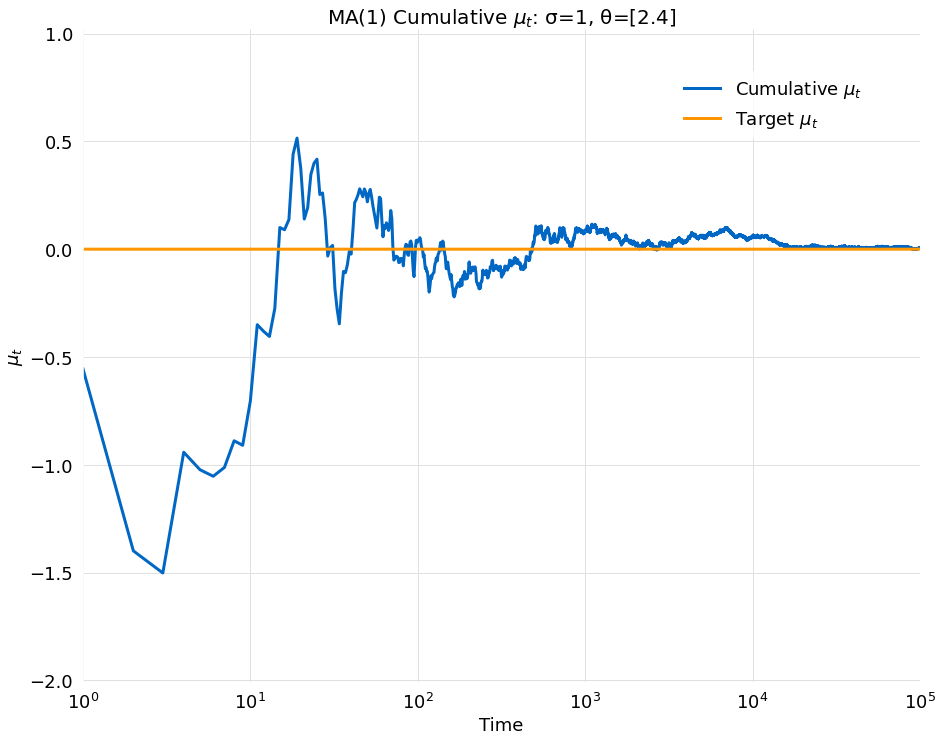

In [78]:
nsample = 100000
θ = numpy.array([2.4])
title = "MA(1) Cumulative " + r"$\mu_t$: " + f"σ={σ}, θ={θ}"
label = r"$\mu_t$"
samples = arima.maq(θ, nsample)
accum = stats.cummean(samples)
target = 0.0
plots.cumulative(accum, target, title, label)

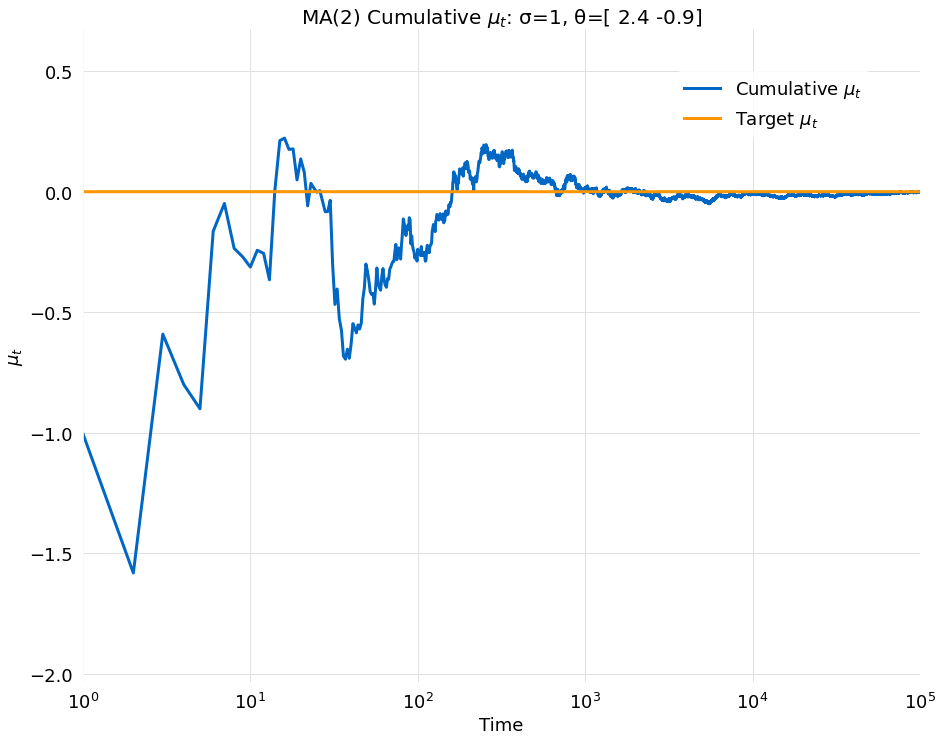

In [79]:
nsample = 100000
θ = numpy.array([2.4, -0.9])
title = "MA(2) Cumulative " + r"$\mu_t$: " + f"σ={σ}, θ={θ}"
label = r"$\mu_t$"
samples = arima.maq(θ, nsample)
accum = stats.cummean(samples)
target = 0.0
plots.cumulative(accum, target, title, label)

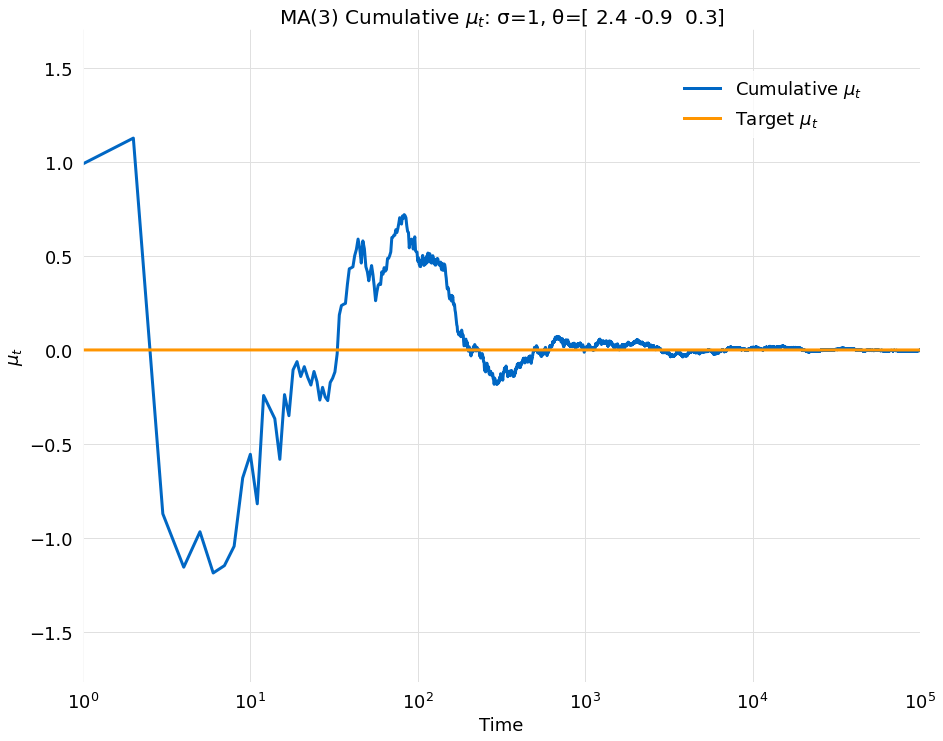

In [80]:
nsample = 100000
θ = numpy.array([2.4, -0.9, 0.3])
title = "MA(3) Cumulative " + r"$\mu_t$: " + f"σ={σ}, θ={θ}"
label = r"$\mu_t$"
samples = arima.maq(θ, nsample)
accum = stats.cummean(samples)
target = 0.0
plots.cumulative(accum, target, title, label)

## Standard Deviation

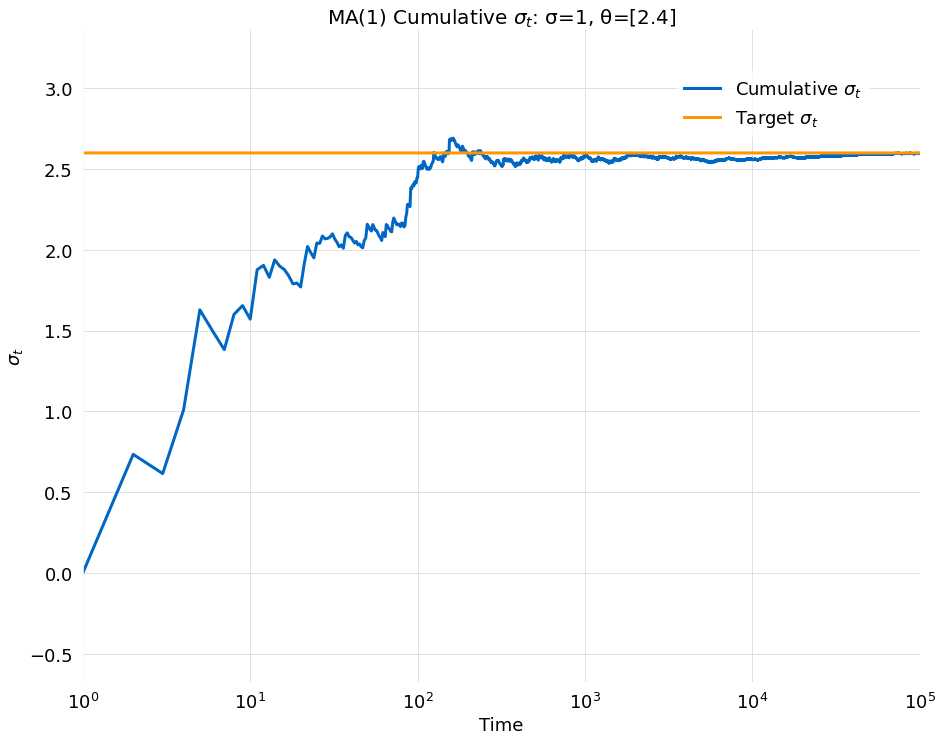

In [81]:
θ = numpy.array([2.4])
nsample = 100000
title = "MA(1) Cumulative " + r"$\sigma_t$: " + f"σ={σ}, θ={θ}"
label = r"$\sigma_t$"
samples = arima.maq(θ, nsample)
accum = stats.cumsigma(samples)
target = sigma(θ)
plots.cumulative(accum, target, title, label)

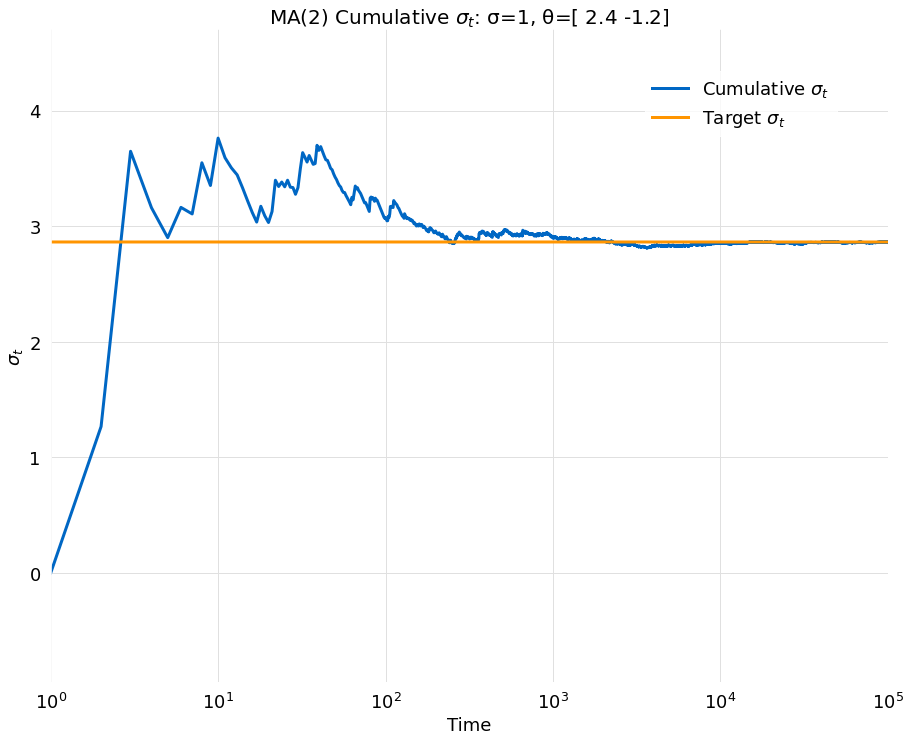

In [82]:
θ = numpy.array([2.4, -1.2])
nsample = 100000
label = r"$\sigma_t$"
samples = arima.maq(θ, nsample)
accum = stats.cumsigma(samples)
target = sigma(θ)
title = "MA(2) Cumulative " + r"$\sigma_t$: " + f"σ={σ}, θ={θ}"
plots.cumulative(accum, target, title, label)

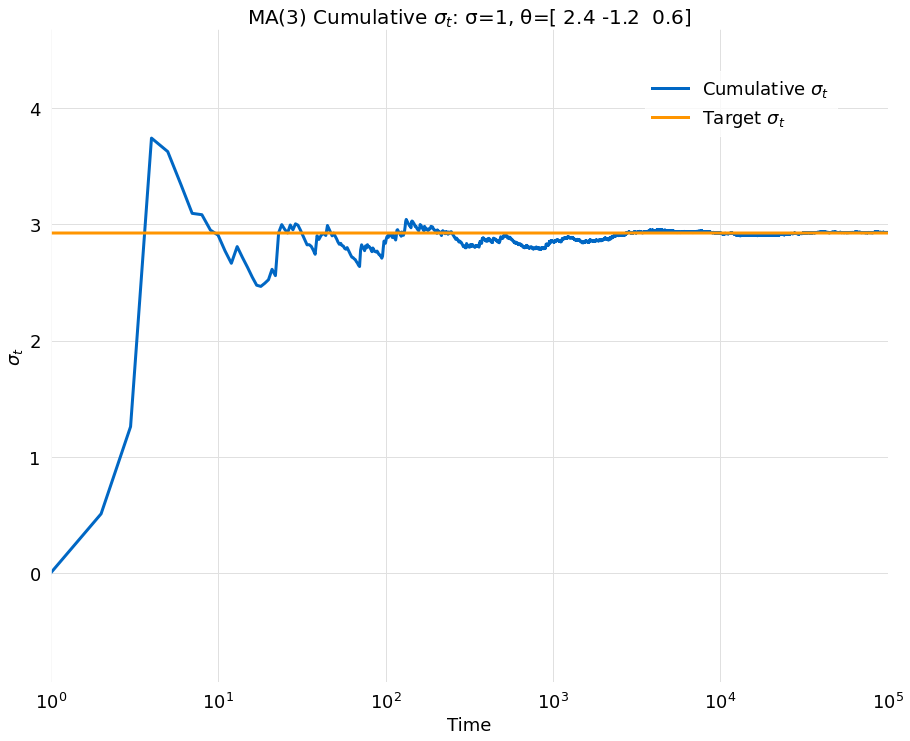

In [83]:
θ = numpy.array([2.4, -1.2, 0.6])
nsample = 100000
label = r"$\sigma_t$"
samples = arima.maq(θ, nsample)
accum = stats.cumsigma(samples)
target = sigma(θ)
title = "MA(3) Cumulative " + r"$\sigma_t$: " + f"σ={σ}, θ={θ}"
plots.cumulative(accum, target, title, label)

## Autocorrelation

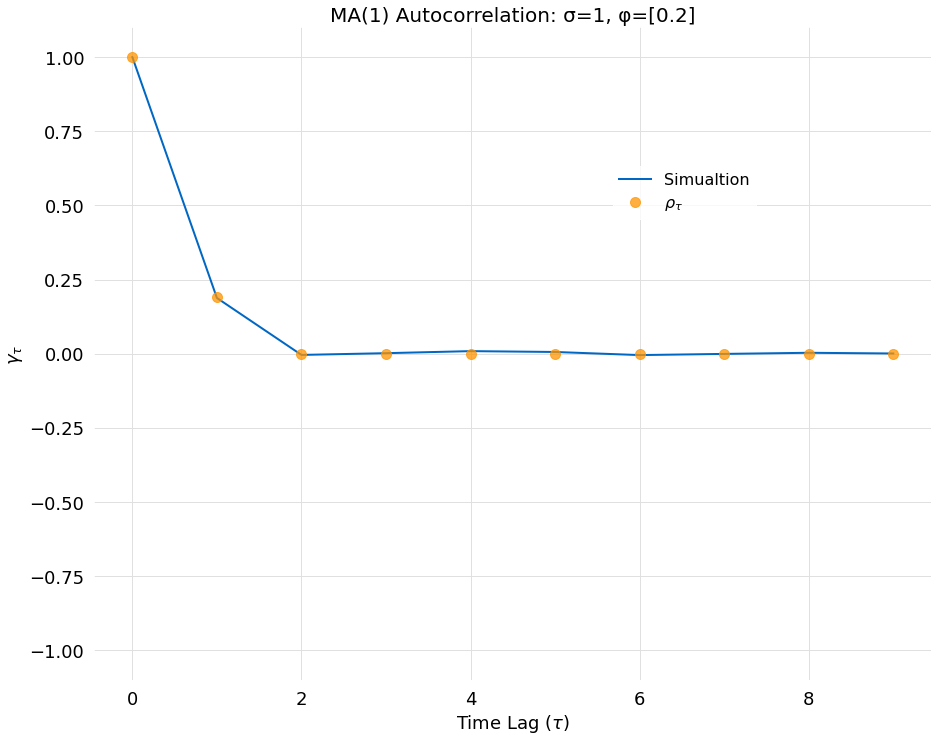

In [84]:
θ = numpy.array([0.2])
lag = 10
nsample = 50000
title = f"MA(1) Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag)
auto_correlation_plot(ac, θ, lag, title, [-1.1, 1.1])

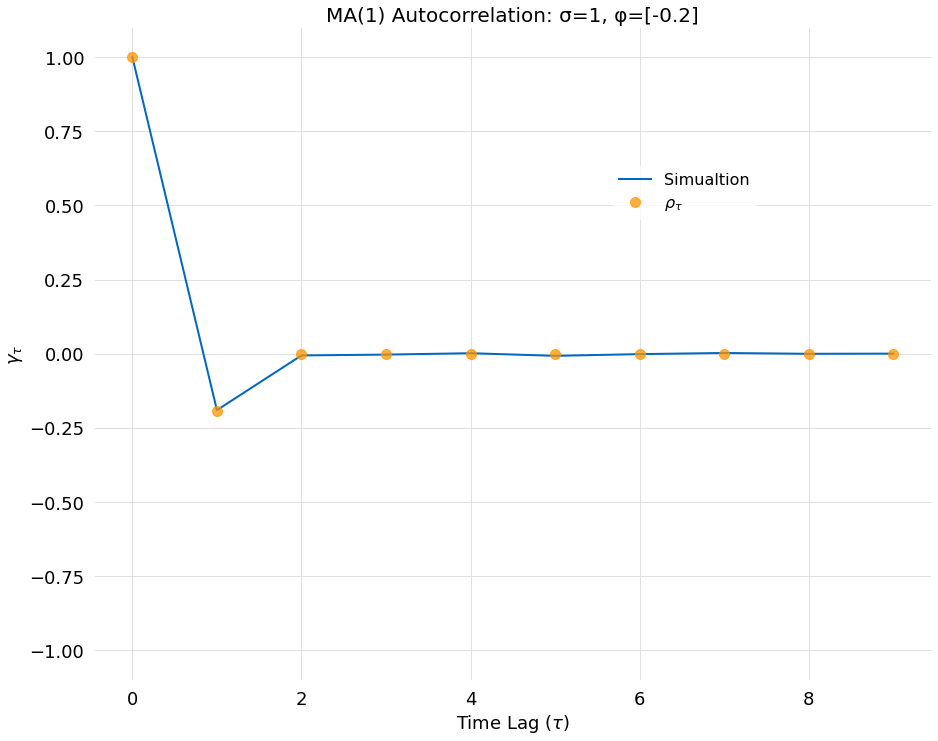

In [85]:
θ = numpy.array([-0.2])
lag = 10
nsample = 50000
title = f"MA(1) Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag)
auto_correlation_plot(ac, θ, lag, title, [-1.1, 1.1])

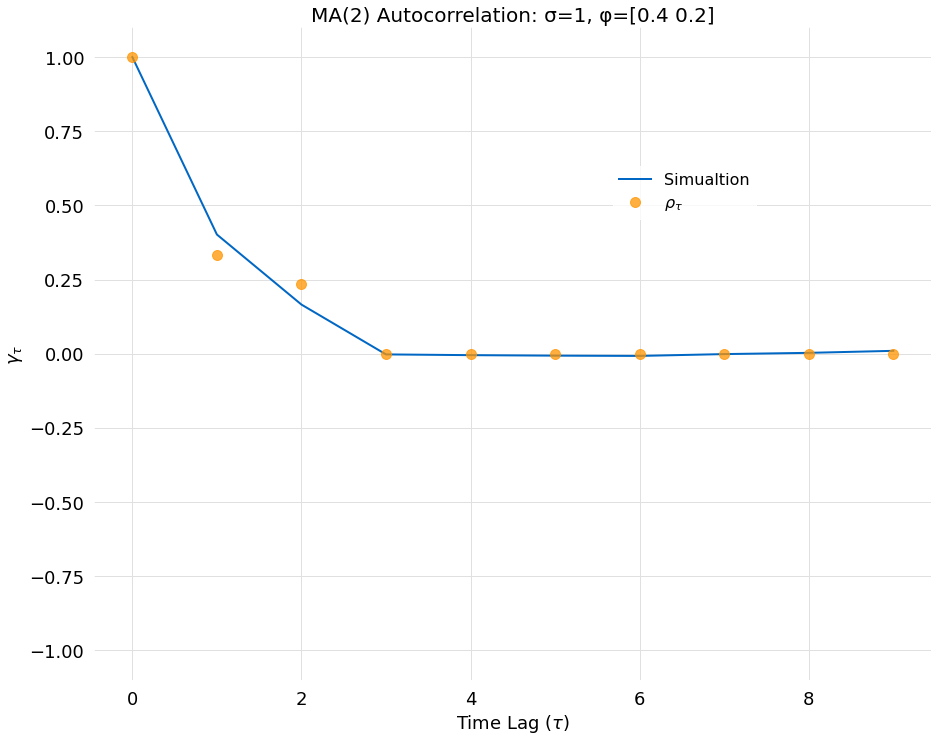

In [86]:
θ = numpy.array([0.4, 0.2])
lag = 10
nsample = 50000
title = f"MA(2) Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag)
auto_correlation_plot(ac, θ, lag, title, [-1.1, 1.1])

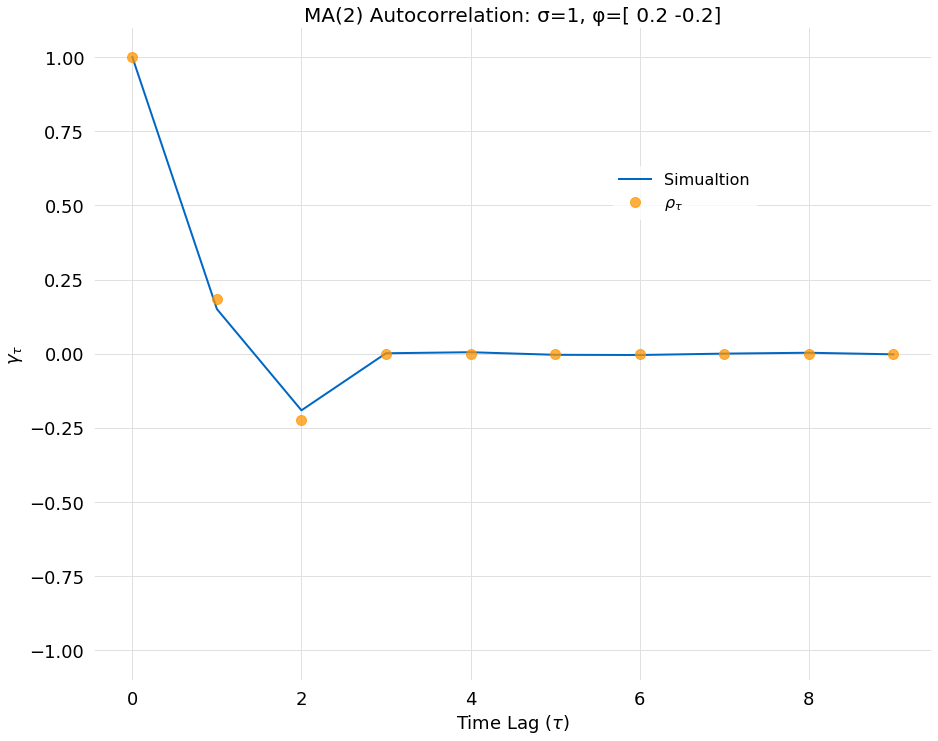

In [87]:
θ = numpy.array([0.2, -0.2])
lag = 10
nsample = 50000
title = f"MA(2) Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag)
auto_correlation_plot(ac, θ, lag, title, [-1.1, 1.1])

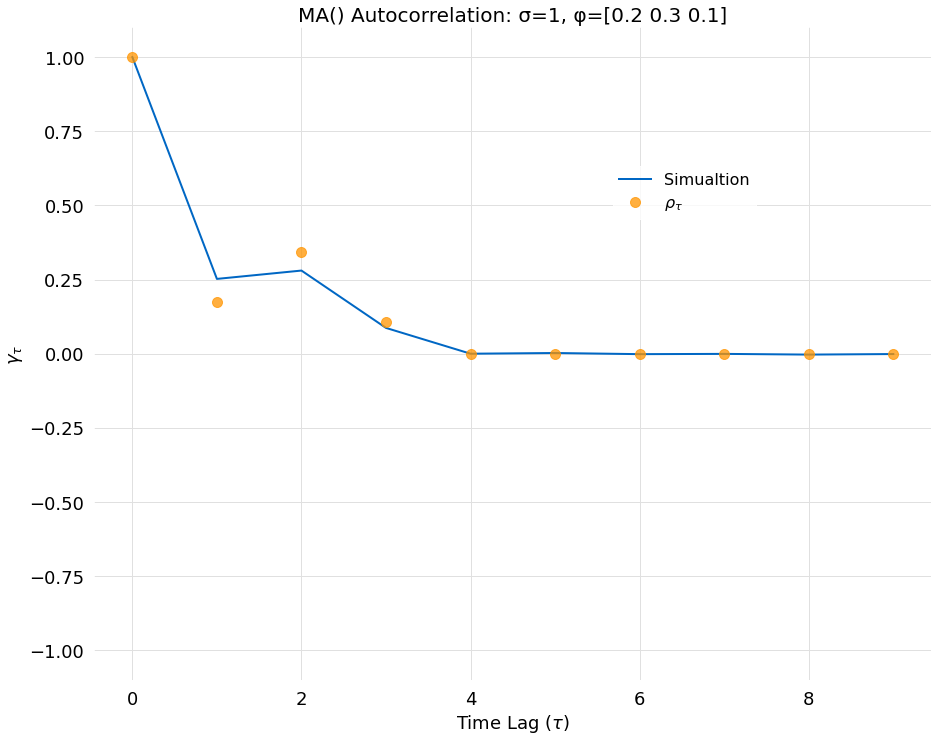

In [88]:
θ = numpy.array([0.2, 0.3, 0.1])
lag = 10
nsample = 500000
title = f"MA() Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag)
auto_correlation_plot(ac, θ, lag, title, [-1.1, 1.1])

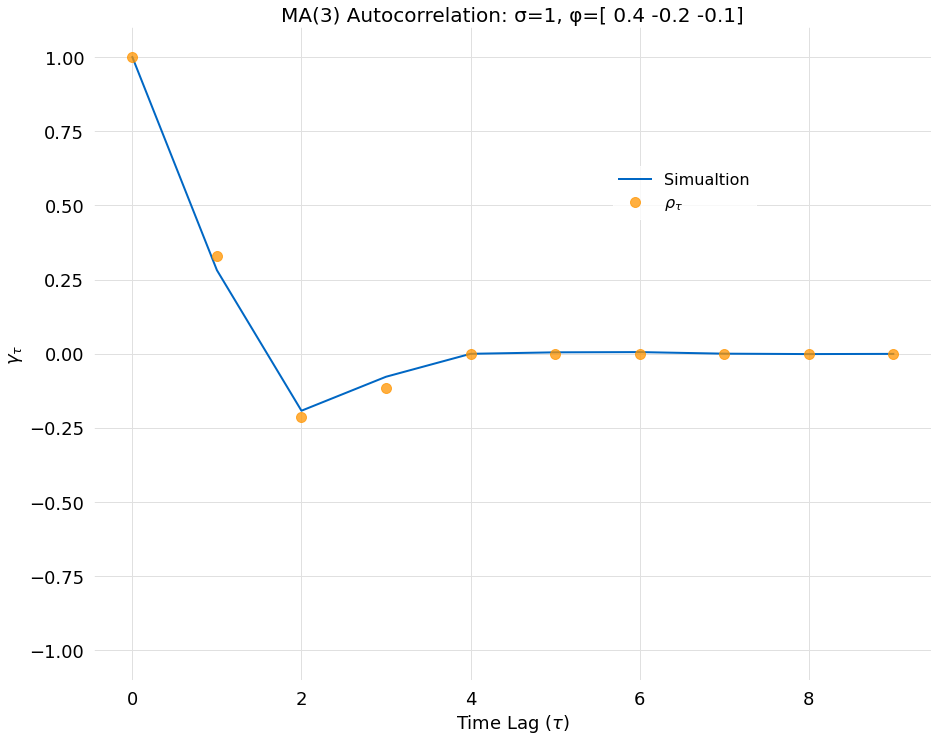

In [89]:
θ = numpy.array([0.4, -0.2, -0.1])
lag = 10
nsample = 50000
title = f"MA(3) Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag)
auto_correlation_plot(ac, θ, lag, title, [-1.1, 1.1])